In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn  as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


In [0]:
#Our aim is to predict whether the subject has depression or not 
mental_health = pd.read_csv('potentialprojectfile_on_mentalHealth.csv')

In [3]:
mental_health.shape

(334, 31)

In [4]:
mental_health.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [5]:
#droping extra/unwanted columns
mental_health.drop(['I am unemployed','Annual income from social welfare programs'], axis=1,inplace = True)
mental_health.shape

(334, 29)

In [0]:
mental_health.rename(columns={"I am currently employed at least part-time": "Employed", "I identify as having a mental illness": "Mental patient", "I have my own computer separate from a smart phone": "Owns a PC"},inplace = True)

In [0]:
mental_health.rename(columns = {"I have been hospitalized before for my mental illness":"admited for mental illness","How many days were you hospitalized for your mental illness":"No of days hospitalized","I am legally disabled":"legally disabled","I have my regular access to the internet":"internet access","I live with my parents":"iving with parents","I have a gap in my resume":"gap in resume","Annual income (including any social welfare programs) in USD":"annual income","I read outside of work and school":"reads","I receive food stamps":"Food stamps","I am on section 8 housing":"under section 8","How many times were you hospitalized for your mental illness":"No of times hospitalized"},inplace = True)

In [8]:
mental_health.describe()

,Employed,Mental patient,Owns a PC,admited for mental illness,No of days hospitalized,legally disabled,internet access,iving with parents,gap in resume,Total length of any gaps in my resume in months.,annual income,reads,Food stamps,under section 8,No of times hospitalized,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
count,334.000000,334.000000,334.000000,334.000000,297.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,333.000000,334.000000,334.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.679641,0.239521,0.874251,0.077844,3.276094,0.098802,0.964072,0.110778,0.245509,8.497006,37.425150,0.889222,0.065868,0.020958,1.194611,0.153153,0.299401,0.257485,0.126126,0.114114,0.147147,0.087087,0.300300
std,0.467315,0.427431,0.332063,0.268328,14.126045,0.298844,0.186390,0.314328,0.431034,20.722643,30.651564,0.314328,0.248424,0.143459,8.115227,0.360677,0.458683,0.437905,0.332491,0.318428,0.354786,0.282387,0.459078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.750000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


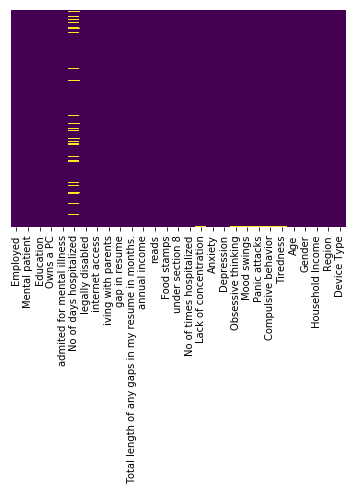

In [9]:
sns.heatmap(mental_health.isnull(),yticklabels = False, cbar = False , cmap ='viridis')


In [10]:
mental_health.isnull().sum()/len(mental_health)

Employed                                            0.000000
Mental patient                                      0.000000
Education                                           0.000000
Owns a PC                                           0.000000
admited for mental illness                          0.000000
No of days hospitalized                             0.110778
legally disabled                                    0.000000
internet access                                     0.000000
iving with parents                                  0.000000
gap in resume                                       0.000000
Total length of any gaps in my resume in months.    0.000000
annual income                                       0.000000
reads                                               0.000000
Food stamps                                         0.000000
under section 8                                     0.000000
No of times hospitalized                            0.000000
Lack of concentration   

In [0]:
days_mean =mental_health['No of days hospitalized'].mean()
mental_health['No of days hospitalized'].fillna(days_mean,inplace=True)



In [12]:
mental_health.tail()

,Employed,Mental patient,Education,Owns a PC,admited for mental illness,No of days hospitalized,legally disabled,internet access,iving with parents,gap in resume,Total length of any gaps in my resume in months.,annual income,reads,Food stamps,under section 8,No of times hospitalized,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
329,0,0,High School or GED,1,0,3.276094,1,1,0,0,0,0,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
330,1,0,Some Undergraduate,1,0,0.000000,0,1,1,0,0,62,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
331,1,0,Some Undergraduate,1,0,0.000000,0,1,0,0,0,0,1,1,0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
332,0,1,Some Undergraduate,0,1,1.000000,1,1,1,1,30,12,1,1,0,3,1.0,1,1,1.0,1.0,1.0,1.0,1.0,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet
333,1,1,Some Undergraduate,1,0,0.000000,1,1,0,0,0,25,1,0,0,0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,18-29,Female,"$10,000-$24,999",Pacific,Android Phone / Tablet


In [0]:
mental_health[mental_health.isnull().any(axis=1)]
mental_health.drop([77,203,333],inplace = True)


In [14]:
mental_health.dtypes

Employed                                              int64
Mental patient                                        int64
Education                                            object
Owns a PC                                             int64
admited for mental illness                            int64
No of days hospitalized                             float64
legally disabled                                      int64
internet access                                       int64
iving with parents                                    int64
gap in resume                                         int64
Total length of any gaps in my resume in months.      int64
annual income                                         int64
reads                                                 int64
Food stamps                                           int64
under section 8                                       int64
No of times hospitalized                              int64
Lack of concentration                   

In [0]:
mental_health['No of days hospitalized'] =mental_health['No of days hospitalized'].astype(int)
mental_health['Lack of concentration'] =mental_health['Lack of concentration'].astype(int)
mental_health['Obsessive thinking'] =mental_health['Obsessive thinking'].astype(int)
mental_health['Mood swings'] =mental_health['Mood swings'].astype(int)
mental_health['Panic attacks'] =mental_health['Panic attacks'].astype(int)
mental_health['Compulsive behavior'] =mental_health['Compulsive behavior'].astype(int)
mental_health['Tiredness'] =mental_health['Tiredness'].astype(int)

In [16]:
mental_health.isnull().sum()

Employed                                            0
Mental patient                                      0
Education                                           0
Owns a PC                                           0
admited for mental illness                          0
No of days hospitalized                             0
legally disabled                                    0
internet access                                     0
iving with parents                                  0
gap in resume                                       0
Total length of any gaps in my resume in months.    0
annual income                                       0
reads                                               0
Food stamps                                         0
under section 8                                     0
No of times hospitalized                            0
Lack of concentration                               0
Anxiety                                             0
Depression                  

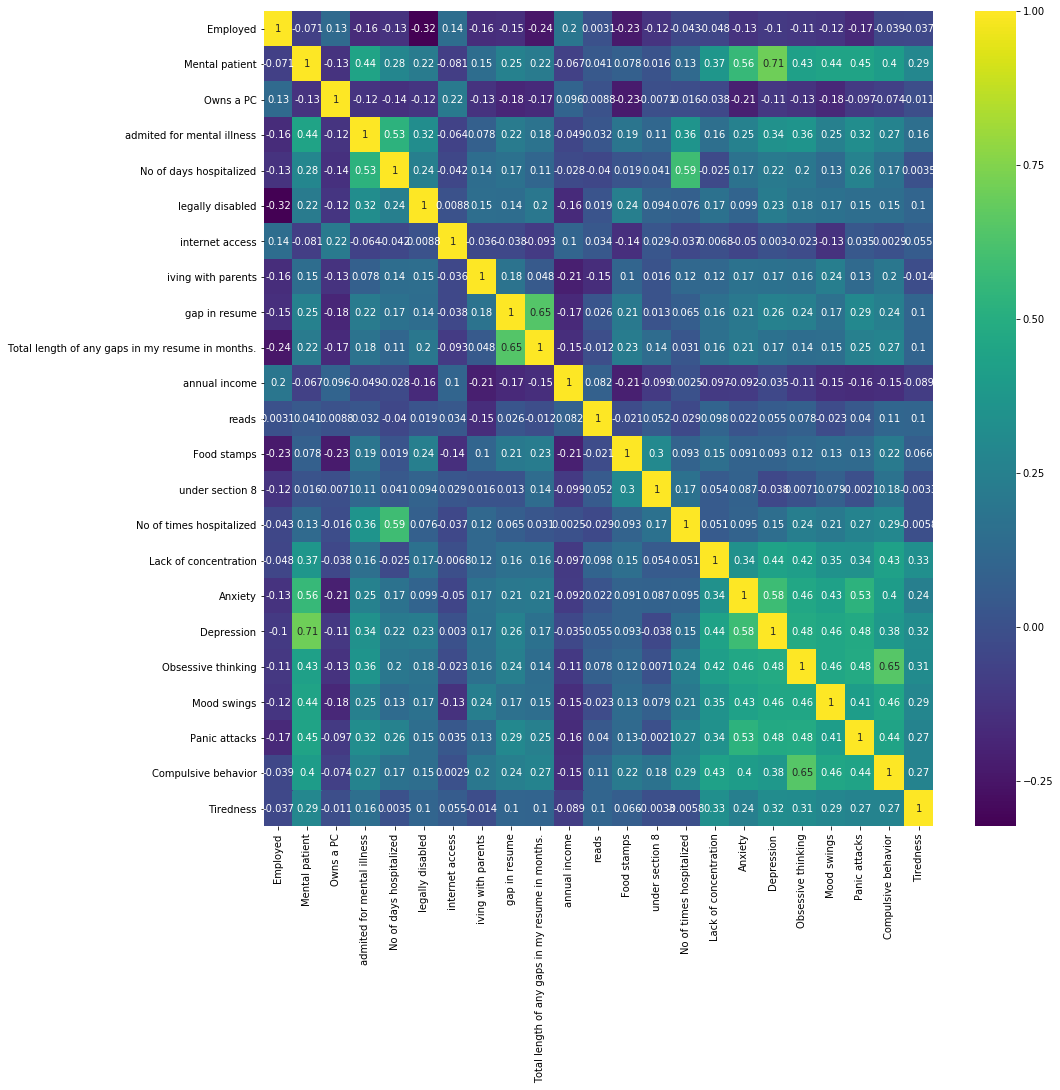

In [17]:
#getting correlation among features
corrmat = mental_health.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(mental_health[top_corr_features].corr(),annot=True,cmap="viridis")

#first we'll try to accomplish our task using label encoding

In [18]:
from sklearn.preprocessing import LabelEncoder 
 


label_encoder = LabelEncoder()
mental_health['education_encoded'] = label_encoder.fit_transform(mental_health['Education'])
mental_health['Age_encoded']=label_encoder.fit_transform(mental_health['Age'])
mental_health['gender_encoded']=label_encoder.fit_transform(mental_health['Gender'])
mental_health['houseincome']=label_encoder.fit_transform(mental_health['Household Income'])
mental_health['Region_encoded']=label_encoder.fit_transform(mental_health['Region'])
mental_health['Device_type']=label_encoder.fit_transform(mental_health['Device Type'])


mental_health.head()

,Employed,Mental patient,Education,Owns a PC,admited for mental illness,No of days hospitalized,legally disabled,internet access,iving with parents,gap in resume,Total length of any gaps in my resume in months.,annual income,reads,Food stamps,under section 8,No of times hospitalized,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type,education_encoded,Age_encoded,gender_encoded,houseincome,Region_encoded,Device_type
0,0,0,High School or GED,0,0,0,0,1,0,1,24,35,1,0,0,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet,3,1,1,7,3,0
1,1,1,Some Phd,1,0,0,0,1,0,0,1,22,1,0,0,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop,4,0,1,8,1,1
2,1,0,Completed Undergraduate,1,0,0,0,1,0,0,0,100,1,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop,2,1,1,4,5,1
3,0,0,Some Undergraduate,1,0,3,0,1,1,1,11,0,1,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop,5,1,1,7,4,3
4,1,1,Completed Undergraduate,1,1,35,1,1,0,1,33,32,1,0,0,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet,2,1,1,7,0,4


In [0]:
#defining the independent and dependent variables
X = mental_health.drop(['Depression','Education','Age','Gender','Household Income','Region','Device Type'], axis = 1)
y = mental_health['Depression']


In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
lr.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [58]:
score = lr.score(X_test, y_test)
print(score)

0.9181818181818182


#what if you have multiple categorical variables and you still need to perform feature encoding on them?


In [97]:

jj = pd.read_csv('potentialprojectfile_on_mentalHealth.csv')
jj.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,24,35,1,1,0,0,0,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,1,22,0,1,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,0,100,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,11,0,1,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,33,32,0,1,30,0,0,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [98]:
jj.drop(['I am unemployed','Annual income from social welfare programs'], axis=1,inplace = True)
jj.shape

(334, 29)

In [0]:
jj.rename(columns={"I am currently employed at least part-time": "Employed", "I identify as having a mental illness": "Mental patient", "I have my own computer separate from a smart phone": "Owns a PC"},inplace = True)
jj.rename(columns = {"I have been hospitalized before for my mental illness":"admited for mental illness","How many days were you hospitalized for your mental illness":"No of days hospitalized","I am legally disabled":"legally disabled","I have my regular access to the internet":"internet access","I live with my parents":"iving with parents","I have a gap in my resume":"gap in resume","Annual income (including any social welfare programs) in USD":"annual income","I read outside of work and school":"reads","I receive food stamps":"Food stamps","I am on section 8 housing":"under section 8","How many times were you hospitalized for your mental illness":"No of times hospitalized"},inplace = True)

In [0]:
days_mean =jj['No of days hospitalized'].mean()
jj['No of days hospitalized'].fillna(days_mean,inplace=True)


In [0]:
jj[jj.isnull().any(axis=1)]
jj.drop([77,203,333],inplace = True)

In [0]:
jj['No of days hospitalized'] =jj['No of days hospitalized'].astype(int)
jj['Lack of concentration'] =jj['Lack of concentration'].astype(int)
jj['Obsessive thinking'] =jj['Obsessive thinking'].astype(int)
jj['Mood swings'] =jj['Mood swings'].astype(int)
jj['Panic attacks'] =jj['Panic attacks'].astype(int)
jj['Compulsive behavior'] =jj['Compulsive behavior'].astype(int)
jj['Tiredness'] =jj['Tiredness'].astype(int)

In [103]:
jj.isnull().sum()

Employed                                            0
Mental patient                                      0
Education                                           0
Owns a PC                                           0
admited for mental illness                          0
No of days hospitalized                             0
legally disabled                                    0
internet access                                     0
iving with parents                                  0
gap in resume                                       0
Total length of any gaps in my resume in months.    0
annual income                                       0
reads                                               0
Food stamps                                         0
under section 8                                     0
No of times hospitalized                            0
Lack of concentration                               0
Anxiety                                             0
Depression                  

In [104]:
for i  in jj.columns:
  print(i,':',len(jj[i].unique()),'labels')

Employed : 2 labels
Mental patient : 2 labels
Education : 8 labels
Owns a PC : 2 labels
admited for mental illness : 2 labels
No of days hospitalized : 25 labels
legally disabled : 2 labels
internet access : 2 labels
iving with parents : 2 labels
gap in resume : 2 labels
Total length of any gaps in my resume in months. : 40 labels
annual income : 84 labels
reads : 2 labels
Food stamps : 2 labels
under section 8 : 2 labels
No of times hospitalized : 13 labels
Lack of concentration : 2 labels
Anxiety : 2 labels
Depression : 2 labels
Obsessive thinking : 2 labels
Mood swings : 2 labels
Panic attacks : 2 labels
Compulsive behavior : 2 labels
Tiredness : 2 labels
Age : 4 labels
Gender : 2 labels
Household Income : 11 labels
Region : 9 labels
Device Type : 5 labels


In [0]:
dum=pd.get_dummies(jj['Education'],drop_first=True)
dum=pd.get_dummies(jj['Age'],drop_first=True)
dum=pd.get_dummies(jj['Gender'],drop_first=True)
dum=pd.get_dummies(jj['Household Income'],drop_first=True)
dum=pd.get_dummies(jj['Region'],drop_first=True)
dum=pd.get_dummies(jj['Device Type'],drop_first=True)


In [0]:
jj=pd.concat([dum,jj],axis=1)

In [0]:
jj.drop('Education',axis=1,inplace=True)
jj.drop('Age',axis=1,inplace=True)
jj.drop('Gender',axis=1,inplace=True)
jj.drop('Household Income',axis=1,inplace=True)
jj.drop('Device Type',axis=1,inplace=True)
jj.drop('Region',axis=1,inplace=True)

In [108]:
jj.head()


,MacOS Desktop / Laptop,Other,Windows Desktop / Laptop,iOS Phone / Tablet,Employed,Mental patient,Owns a PC,admited for mental illness,No of days hospitalized,legally disabled,internet access,iving with parents,gap in resume,Total length of any gaps in my resume in months.,annual income,reads,Food stamps,under section 8,No of times hospitalized,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
0,0,0,0,0,0,0,0,0,0,0,1,0,1,24,35,1,0,0,0,1,1,1,1,0,1,0,0
1,1,0,0,0,1,1,1,0,0,0,1,0,0,1,22,1,0,0,0,1,1,1,0,0,1,0,1
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,100,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,3,0,1,1,1,11,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,1,35,1,1,0,1,33,32,1,0,0,4,1,1,1,1,1,1,1,1


In [0]:
jj

In [109]:
jj.dtypes

MacOS Desktop / Laptop                              uint8
Other                                               uint8
Windows Desktop / Laptop                            uint8
iOS Phone / Tablet                                  uint8
Employed                                            int64
Mental patient                                      int64
Owns a PC                                           int64
admited for mental illness                          int64
No of days hospitalized                             int64
legally disabled                                    int64
internet access                                     int64
iving with parents                                  int64
gap in resume                                       int64
Total length of any gaps in my resume in months.    int64
annual income                                       int64
reads                                               int64
Food stamps                                         int64
under section 

In [0]:
jj['MacOS Desktop / Laptop'] =jj['MacOS Desktop / Laptop'].astype(int)
jj['Other'] =jj['Other'].astype(int)
jj['Windows Desktop / Laptop'] =jj['Windows Desktop / Laptop'].astype(int)

jj['Employed'] =jj['Employed'].astype(int)


In [0]:
X = jj.drop(['Depression'],axis = 1)
y = jj['Depression']

In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [128]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
score = lr.score(X_test, y_test)
print(score)

0.8805970149253731
